## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from __future__ import absolute_import, division, print_function
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from IPython.core.interactiveshell import InteractiveShell



from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Text(0.5,1,'9')

Text(0.5,1,'0')

Text(0.5,1,'0')

Text(0.5,1,'3')

Text(0.5,1,'0')

Text(0.5,1,'2')

Text(0.5,1,'7')

Text(0.5,1,'2')

Text(0.5,1,'5')

Text(0.5,1,'5')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

label for each of the below images:  [9 0 0 3 0 2 7 2 5 5]


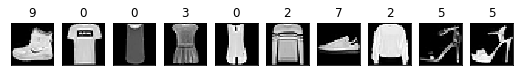

In [3]:
#Just view some sample images
fig, axes = plt.subplots(1, 10,figsize=(9, 9), sharey=True, sharex=True)

for i in range(10):
    axes[i].imshow(x_train[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    axes[i].set_title(y_train[i])
    
plt.xticks([])
plt.yticks([])

print('label for each of the below images: ', y_train[0:10])

### Find no.of samples are there in training and test datasets

In [4]:
print(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0])
#There are 60k training samples and 10k test samples. 

60000 60000 10000 10000


### Find dimensions of an image in the dataset

In [5]:
print(x_train.shape[1:3], x_test.shape[1:3])
print(x_train[1].shape, x_test[3].shape)
#Images in the dataset have 28x28 dimension/pixels. 

(28, 28) (28, 28)
(28, 28) (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)



print(x_train.shape[1:3], x_test.shape[1:3])
print(x_train[1].shape, x_test[3].shape)
print(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0])

(28, 28) (28, 28)
(28, 28, 1) (28, 28, 1)
60000 60000 10000 10000


### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
#Done above

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [8]:
#Done above

### Import the necessary layers from keras to build the model

In [9]:
#TRAIN = False
BATCH_SIZE = 30
EPOCHS = 10
PATIENCE = 5

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
# Define Model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))  

# Max Pooling
#model3.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
#model3.add(Dropout(0.25))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
    
# More Dropout
#model3.add(Dropout(0.5))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
             validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.3726 - acc: 0.8649 - val_loss: 0.2838 - val_acc: 0.8950
Epoch 2/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2315 - acc: 0.9142 - val_loss: 0.2609 - val_acc: 0.9082
Epoch 3/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1688 - acc: 0.9377 - val_loss: 0.2683 - val_acc: 0.9124
Epoch 4/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1190 - acc: 0.9557 - val_loss: 0.2646 - val_acc: 0.9150
Epoch 5/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0805 - acc: 0.9707 - val_loss: 0.2935 - val_acc: 0.9109
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0542 - acc: 0.9807 - val_loss: 0.3842 - val_acc: 0.9127
Epoch 7/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0397 - acc: 0.9857 - val_loss: 0.3958 - 

In [11]:
loss_and_metrics1 = model1.evaluate(x_test, y_test)
print(loss_and_metrics1)

10000/10000 [==============================] - 5s 471us/step
[0.5217182236907072, 0.9096]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))  

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
    
# More Dropout
#model2.add(Dropout(0.25))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':


# Compile the Model and Train the model 

In [13]:
# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
             validation_data=(x_test, y_test), callbacks=callback_list)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3953 - acc: 0.8587 - val_loss: 0.3095 - val_acc: 0.8877
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2594 - acc: 0.9044 - val_loss: 0.2678 - val_acc: 0.9017
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2100 - acc: 0.9221 - val_loss: 0.2499 - val_acc: 0.9096
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1786 - acc: 0.9327 - val_loss: 0.2285 - val_acc: 0.9183
Epoch 5/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1499 - acc: 0.9438 - val_loss: 0.2372 - val_acc: 0.9210
Epoch 6/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1286 - acc: 0.9519 - val_loss: 0.2484 - val_acc: 0.9184
Epoch 7/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1114 - acc: 0.9586 - val_loss: 0.2709 - val_acc

In [14]:
loss_and_metrics2 = model2.evaluate(x_test, y_test)
print(loss_and_metrics2)

#The Acurracy has increased as expected. 
#Overfitting is reduced- difference between training and validation accuracy has reduced due to dropout and maxpooling layers. 
#Dropout layer, as a regularization technique, helps avoid model from memorizing the data activating 
#Maxpool layer, as a sub(down)sampling technique, reduces feature map making them sub region scale or orientation invariant

#Maxpool layer has also seem to have reduced the training time little bit as expected. It reduces computational cost by reducing
#features

10000/10000 [==============================] - 4s 410us/step
[0.2840807314634323, 0.9226]
